[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [12] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [6] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [12] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[6]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


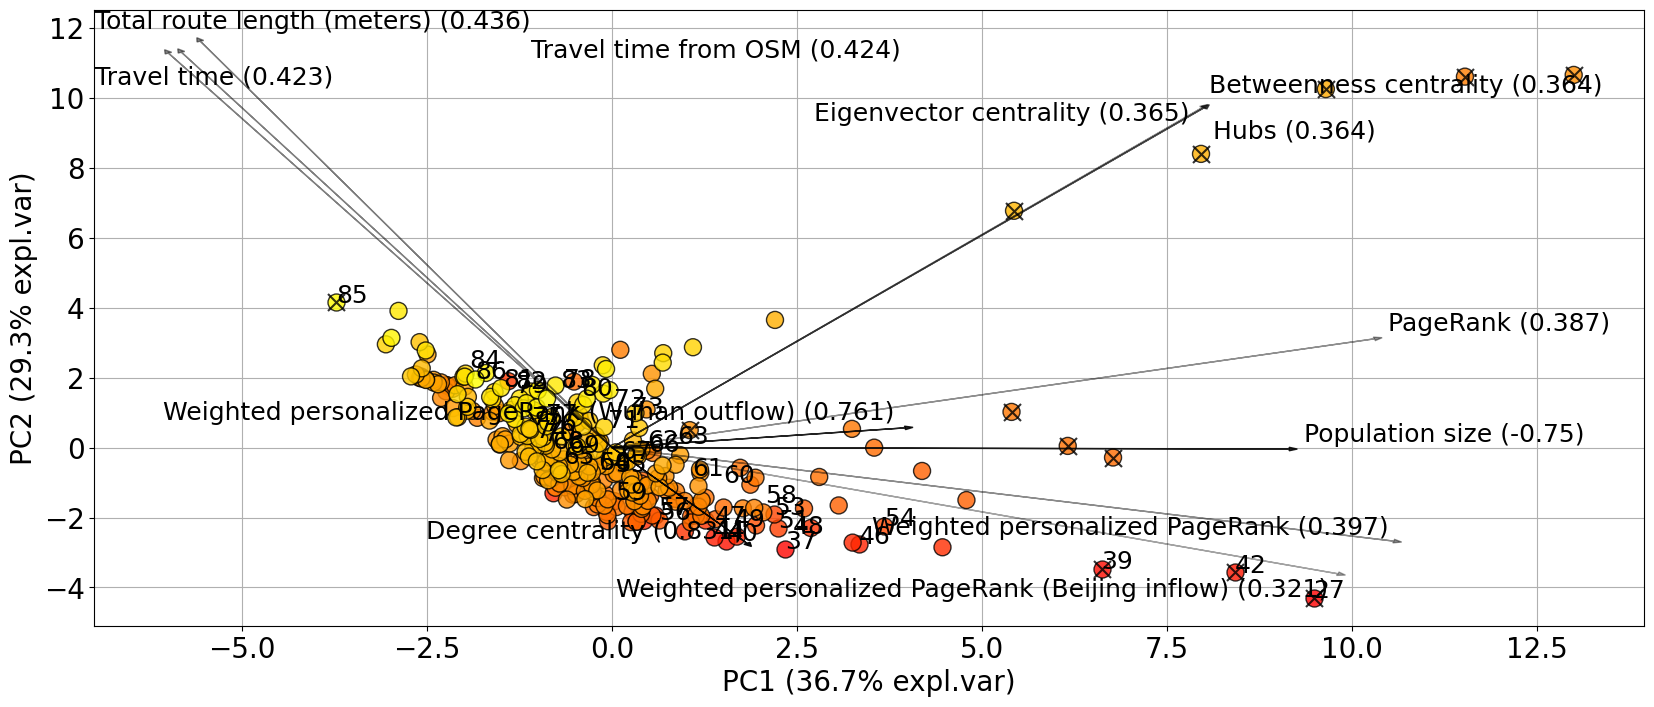

/var/folders/tt/5m471nxs2815sn_md1rbdvxdb8phhw/T/ipykernel_24951/2181651109.py:63: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [4]:
# importing required libraries
import pandas as pd
import numpy as np
# Import the StandardScaler
from sklearn.preprocessing import StandardScaler
# Load library
from pca import pca
%matplotlib inline
import matplotlib.pyplot as plt


# importing or loading the dataset
dataset = pd.read_csv('./data/dataset_for_PCA.csv')
dataset = dataset[['R_0 3', 'population', 'travel_time_S_Google', 'Total_route_length_m', 'travel_time_S', 'DegreeCentrality', 'EigenvectorCentrality', 'PageRank', 'WeightedPersonalizedPagerank', 'Hubs', 'BetweennessCentrality', 'WeightedPersonalizedPagerankWuhanOutflow', 'WeightedPersonalizedPagerankBeijingInflow']]  
dataset = dataset.rename(columns={'R_0 3': 'R_0_3'})

# rename columns of the dataset to make them more readable
dataset = dataset.rename(columns={
    'R_0 3': 'COVID-19 reproduction number',
    'population': 'Population size',
    'travel_time_S_Google': 'Travel time',
    'Total_route_length_m': 'Total route length (meters)',
    'travel_time_S': 'Travel time from OSM',
    'DegreeCentrality': 'Degree centrality',
    'EigenvectorCentrality': 'Eigenvector centrality',
    'PageRank': 'PageRank',
    'WeightedPersonalizedPagerank': 'Weighted personalized PageRank',
    'Hubs': 'Hubs',
    'BetweennessCentrality': 'Betweenness centrality',
    'WeightedPersonalizedPagerankWuhanOutflow': 'Weighted personalized PageRank (Wuhan outflow)',
    'WeightedPersonalizedPagerankBeijingInflow': 'Weighted personalized PageRank (Beijing inflow)'
})


# # distributing the dataset into two components X and Y
X = dataset.iloc[:, 1:]
#In general it is a good idea to scale the data
scaler = StandardScaler(with_mean=True, with_std=True)
X = scaler.fit_transform(X)
y = np.array(dataset['R_0_3'])
# create a list of column labels without the first column
col_labels = list(dataset.columns[1:])

# Initialize pca with default parameters
model = pca(normalize=True, n_components=0.95)
#model = pca(n_components=3)

# Fit transform and include the column labels and row labels
results = model.fit_transform(X, col_labels=col_labels, row_labels=y)

# Scatter plot with loadings
#model.biplot()
# Scatter plot with loadings
fig, ax = model.biplot(PC=[0, 1], color_arrow='k', arrowdict={'color_text': 'k'}, 
                       HT2=True, label=True, legend=False, cmap = 'autumn',
                       figsize=(20, 8), title='', n_feat= 12) #n_feat=4 #arrowdict={'color_strong': 'g', 'color_weak': 'r'},
#fig.set_visible(True)
#ax.set_title(' ', loc='center')
#fig.text(x=5, y=5, s='matplotlib')
# fig.savefig('Principal_Component_Analysis_biplot_variable_correlation_plots.pdf', 
#             metadata = {'Creator': 'Reju Sam John', 'Author': 'Reju', 'Title': 'Beijing records 100 infections Principal Component Analysis'},
#            bbox_inches = 'tight', pad_inches = 0.2)
fig.show()